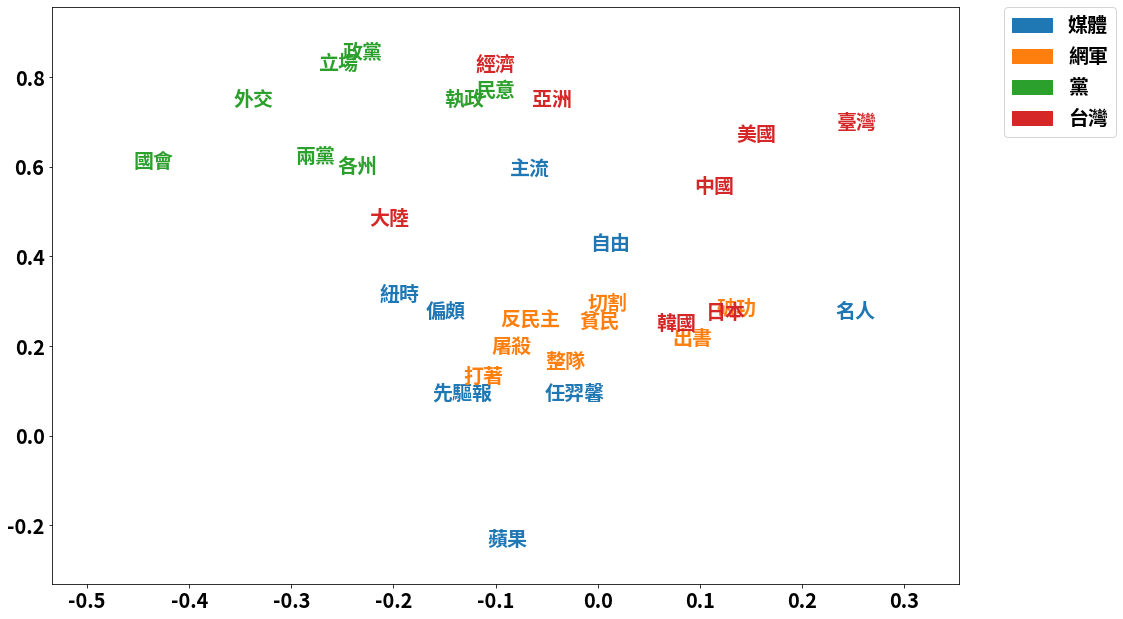

媒體
[('主流', 0.67372482) ('偏頗', 0.63249569) ('紐時', 0.62211737)
 ('自由', 0.60821955) ('任羿馨', 0.60231029) ('名人', 0.59313954)
 ('蘋果', 0.59293508) ('先驅報', 0.59015056)]
網軍
[('整隊', 0.8883443 ) ('切割', 0.88331638) ('屠殺', 0.87351943)
 ('打著', 0.87059687) ('出書', 0.86813753) ('破功', 0.86763727)
 ('反民主', 0.86652659) ('貧民', 0.86504442)]
黨
[('兩黨', 0.88302987) ('國會', 0.87966222) ('立場', 0.87084928)
 ('民意', 0.86715953) ('政黨', 0.86440996) ('執政', 0.85980577)
 ('各州', 0.8494322 ) ('外交', 0.84620168)]
台灣
[('中國', 0.84139476) ('日本', 0.79866064) ('臺灣', 0.79035884)
 ('亞洲', 0.76119477) ('美國', 0.74024595) ('韓國', 0.7258324 )
 ('經濟', 0.70348684) ('大陸', 0.70298475)]


In [13]:
import word2vec

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import numpy as np

from sklearn.decomposition import PCA


model = word2vec.load('ptt-post-content.bin')

pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(model.vectors)

target_words = '媒體', '網軍', '黨', '台灣'

indices_and_distances_by_words = [model.cosine(word, n=8) 
                                  for word in target_words]

data_to_draw = [(model.vocab[indices], vectors_pca[indices])
                for indices, _ in indices_and_distances_by_words]

plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']  
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20
plt.rcParams['figure.autolayout'] = True


fig = plt.figure(figsize=(16, 9))
axes = fig.add_subplot()

for i, data in enumerate(data_to_draw):
    for word, vectors in zip(*data):
        axes.text(*vectors, word,ha='center', va='center', color=f'C{i}')

XYs = np.stack([vectors for _, vectors in data_to_draw]).reshape(-1, 2)

axes.axis([XYs[:, 0].min() - 0.1, XYs[:, 0].max() + 0.1,
           XYs[:, 1].min() - 0.1, XYs[:, 1].max() + 0.1])

patches = [mpatches.Patch(color=f'C{i}', label=f'{word}') 
           for i, word in enumerate(target_words)]

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=patches)
plt.savefig('target_words_top8.png')
plt.show()


for i, indices_and_distances in enumerate(indices_and_distances_by_words):
    print(target_words[i])
    print(model.generate_response(*indices_and_distances))